<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP1/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Se importan las librerías necesarias.

In [2]:
def pulso_unitario(x):
     return np.where(np.abs(x)<=1, 1, 0)

Se define la función pulso unitario.

Text(0, 0.5, 'y')

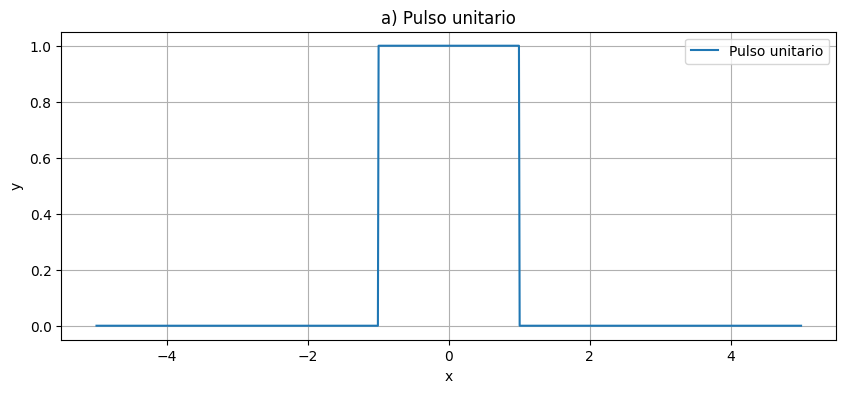

In [3]:
x_valores=np.linspace(-5,5,1000)
y_valores=pulso_unitario(x_valores)

plt.figure(figsize=(10,4))
plt.plot(x_valores, y_valores, label="Pulso unitario")
plt.title("a) Pulso unitario")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Se grafica la función pulso unitario.

In [4]:
x, w=sp.symbols('x w', real=True)

Integral de Fourier.

In [5]:
f = sp.Piecewise((1, sp.And(x>=-1, x<=1)), (0, True))

f(x)=1 si -1<=x<=1, 0 en otro caso.

In [6]:
F = sp.integrate(f*sp.cos(w*x), (x,-sp.oo,sp.oo))

Transformada de Fourier en cosenos (par).

In [7]:
F_w=sp.simplify(F)

Reconstrucción con inversa de Fourier.

In [21]:
x_valores=sp.Symbol('x', real=True)
f_reconstruida=(1/sp.pi)*sp.integrate(F_w*sp.cos(w*x_valores), (w,0,sp.oo))
f_reconstruida_func = sp.lambdify(x_valores, f_reconstruida)

In [22]:
x_plot=np.linspace(-5,5,1000)
y_reconstruida=np.array([f_reconstruida_func(val) for val in x_plot])

<lambdifygenerated-1>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda w: select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)*cos(w*x)/w,2*cos(w*x)], default=nan), 0, inf)[0]/pi
<lambdifygenerated-1>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda w: select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)*cos(w*x)/w,2*cos(w*x)], default=nan), 0, inf)[0]/pi


Evaluando en un rango.

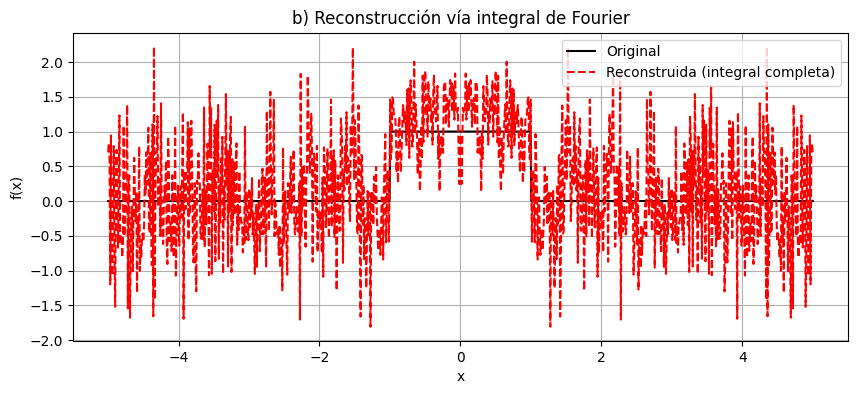

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(x_plot, pulso_unitario(x_plot), 'k', label="Original")
plt.plot(x_plot, y_reconstruida, 'r--', label="Reconstruida (integral completa)")
plt.title("b) Reconstrucción vía integral de Fourier")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Se grafica.

Aproximaciones con integrales trucadas.

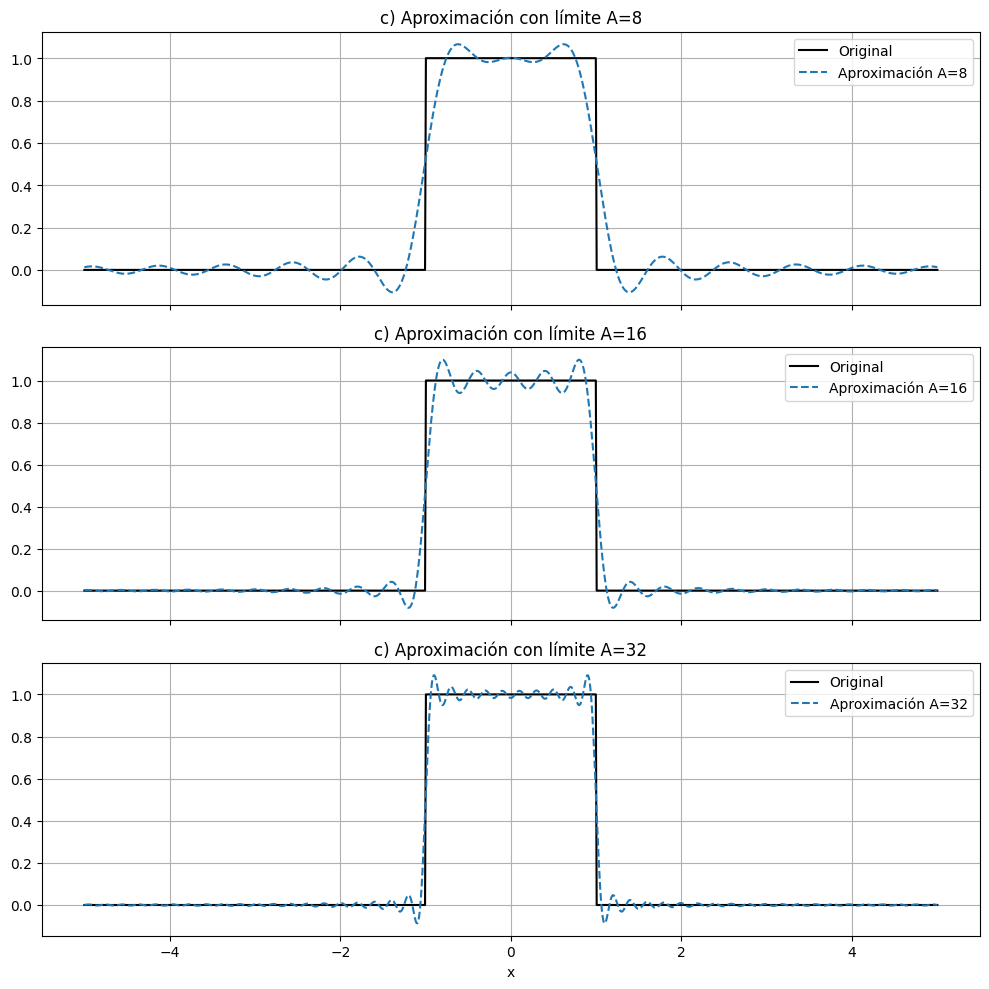

In [32]:
fig, ax=plt.subplots(3,1,figsize=(10,10),sharex=True)
A_valores=[8, 16, 32]

for i, A in enumerate(A_valores):
    integral_aprox = (1/sp.pi) * sp.integrate(F_w * sp.cos(w * x_valores), (w, 0, A))
    f_aprox_func = sp.lambdify(x_valores, integral_aprox)
    y_aprox = np.array([f_aprox_func(val) for val in x_plot])

    ax[i].plot(x_plot, pulso_unitario(x_plot), 'k', label="Original")
    ax[i].plot(x_plot, y_aprox, '--', label=f"Aproximación A={A}")
    ax[i].set_title(f"c) Aproximación con límite A={A}")
    ax[i].grid(True)
    ax[i].legend()

plt.xlabel("x")
plt.tight_layout()
plt.show()

Cálculo y gráfica.